# Exploring pyrtlsdr

Examples from https://github.com/roger-/pyrtlsdr

In [5]:
from rtlsdr import RtlSdr

sdr = RtlSdr()

# configure device
sdr.sample_rate = 2.048e6  # Hz
sdr.center_freq = 70e6     # Hz
sdr.freq_correction = 60   # PPM
sdr.gain = 'auto'

print(sdr.read_samples(512))

sdr.close()

[-0.01960784-0.00392157j -0.00392157-0.01176471j  0.00392157-0.00392157j
 -0.00392157+0.00392157j  0.00392157-0.00392157j  0.00392157+0.00392157j
 -0.00392157-0.00392157j -0.00392157+0.00392157j -0.01176471+0.01960784j
 -0.00392157-0.01176471j  0.00392157-0.00392157j  0.00392157+0.01176471j
  0.00392157+0.00392157j  0.01176471-0.04313725j  0.00392157-0.01960784j
  0.01176471-0.01176471j  0.01176471-0.01960784j  0.00392157+0.00392157j
 -0.00392157-0.00392157j -0.01176471-0.00392157j -0.00392157+0.00392157j
 -0.00392157+0.00392157j -0.00392157+0.00392157j -0.00392157+0.01960784j
 -0.00392157-0.00392157j -0.00392157-0.00392157j  0.00392157-0.00392157j
  0.00392157-0.01176471j -0.00392157+0.00392157j -0.00392157-0.00392157j
 -0.00392157+0.00392157j  0.01960784-0.00392157j  0.00392157-0.00392157j
 -0.00392157+0.00392157j -0.00392157-0.00392157j  0.00392157-0.00392157j
  0.01176471-0.00392157j  0.00392157-0.00392157j  0.01960784-0.01960784j
 -0.00392157-0.00392157j -0.00392157-0.00392157j  0

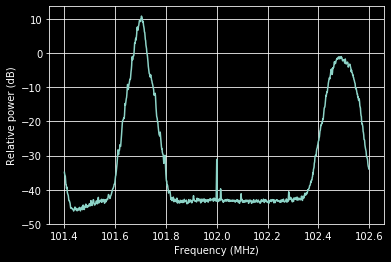

In [1]:
from pylab import *
from rtlsdr import *

sdr = RtlSdr()

# configure device
sdr.sample_rate = 1.2e6  # about half the max BW of most RTL dongles
sdr.center_freq = 102e6   # 95MHz, FM band
sdr.gain = 4

samples = sdr.read_samples(256*1024)
sdr.close()

# use matplotlib to estimate and plot the PSD
psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

show()

# More Examples

Checkout `demo_waterfall.py` copied from the pyrtlsdr distribution.

More examples from https://hackaday.io/project/165403/logs?sort=oldest


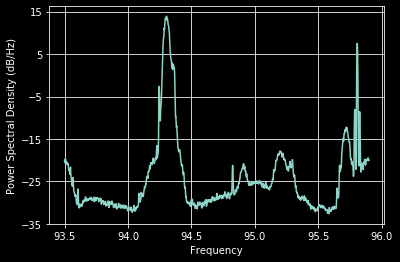

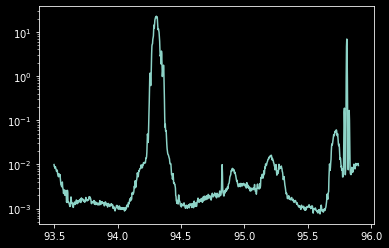

In [11]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from rtlsdr import RtlSdr
import numpy as np
from matplotlib import mlab as mlab

sdr = RtlSdr()
# configure device
sdr.sample_rate = 2.4e6  # Hz
sdr.center_freq = 94.7e6  # Hz
sdr.freq_correction = 60   # PPM
sdr.gain = 'auto'

fig = plt.figure()
graph_out = fig.add_subplot(1, 1, 1)

fig2 = plt.figure()
graph_out2 = fig2.add_subplot(1, 1, 1)

def animate(i):
    graph_out.clear()
    samples = sdr.read_samples(256*1024)
    # use matplotlib to estimate and plot the PSD
    graph_out.psd(
        samples,
        NFFT=1024,
        Fs=sdr.sample_rate / 1e6,
        Fc=sdr.center_freq / 1e6
    )

def animate2(i):
    graph_out2.clear()
    samples = sdr.read_samples(256*1024)
    # use matplotlib to estimate and plot the PSD
    power, psd_freq = mlab.psd(
        samples,
        NFFT=1024,
        Fs=sdr.sample_rate / 1e6
    )
    psd_freq = psd_freq + sdr.center_freq/1e6
    graph_out2.semilogy(psd_freq, power)

try:
    ani = animation.FuncAnimation(fig, animate, interval=10)
    ani2 = animation.FuncAnimation(fig, animate2, interval=10)
    plt.show()
except KeyboardInterrupt:
    pass
finally:
    sdr.close() 


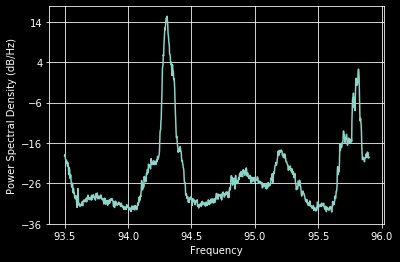

In [7]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from rtlsdr import RtlSdr
import numpy as np

sdr = RtlSdr()
# configure device
sdr.sample_rate = 2.4e6  # Hz
sdr.center_freq = 94.7e6  # Hz
sdr.freq_correction = 60   # PPM
sdr.gain = 'auto'

fig = plt.figure()
graph_out = fig.add_subplot(1, 1, 1)


def animate(i):
    graph_out.clear()
    #samples = sdr.read_samples(256*1024)
    samples = sdr.read_samples(128*1024)
    # use matplotlib to estimate and plot the PSD
    graph_out.psd(samples, NFFT=1024, Fs=sdr.sample_rate /
                  1e6, Fc=sdr.center_freq/1e6)
    #graph_out.xlabel('Frequency (MHz)')
    #graph_out.ylabel('Relative power (dB)')


try:
    ani = animation.FuncAnimation(fig, animate, interval=10)
    plt.show()
except KeyboardInterrupt:
    pass
finally:
    sdr.close() 
    